In [65]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import csv
import uproot

from mpl_toolkits.mplot3d import axes3d 

In [66]:
def make_arr(files, lists):
    for i in range(len(files)):
        print(files[i])
        with open('outputs/' + files[i], 'r', newline='') as f:
            for line in f:
                l1 = []
                sl = line.split(',')
                for entry in sl:
                    
                    l1.append(np.float64(entry))

                arr = np.array(l1)
                lists[i].append(arr)

In [67]:
direction_dot = []; index_of_0_99 = [];

In [68]:
directions_truth = []; startpoints_truth = []; endpoints_truth = []; pathlen_truth = [];
trkphi_truth = []; trktheta_truth = []; energy_per_event = []; hits_per_event = [];

truth_files = ["directions_truth.txt", "startpoints_truth.txt", "endpoints_truth.txt",
              "pathlen_truth.txt", "trkphi_truth.txt","trktheta_truth.txt", "energy_per_event.txt",
              "hits_per_events.txt"]

truth_lists = [directions_truth, startpoints_truth, endpoints_truth, pathlen_truth,
              trkphi_truth, trktheta_truth, energy_per_event, hits_per_event]

make_arr(truth_files, truth_lists)

directions_truth.txt
startpoints_truth.txt
endpoints_truth.txt
pathlen_truth.txt
trkphi_truth.txt
trktheta_truth.txt
energy_per_event.txt
hits_per_events.txt


In [69]:
directions_reco = []; endpoints_reco = []; startpoints_reco = []; trklen_reco = [];
trkphi_reco = []; trkpidbestplane_reco = []; trktheta_reco = []; ntracks_reco = [];

reco_files = ["directions_reco.txt", "endpoints_reco.txt", "startpoints_reco.txt",
             "trklen_reco.txt", "trkphi_reco.txt", "trkpidbestplane_reco.txt",
             "trktheta_reco.txt", "ntracks_reco.txt"]
reco_lists = [directions_reco, endpoints_reco, startpoints_reco, trklen_reco, trkphi_reco,
              trkpidbestplane_reco, trktheta_reco, ntracks_reco]
make_arr(reco_files, reco_lists)


directions_reco.txt
endpoints_reco.txt
startpoints_reco.txt
trklen_reco.txt
trkphi_reco.txt
trkpidbestplane_reco.txt
trktheta_reco.txt
ntracks_reco.txt


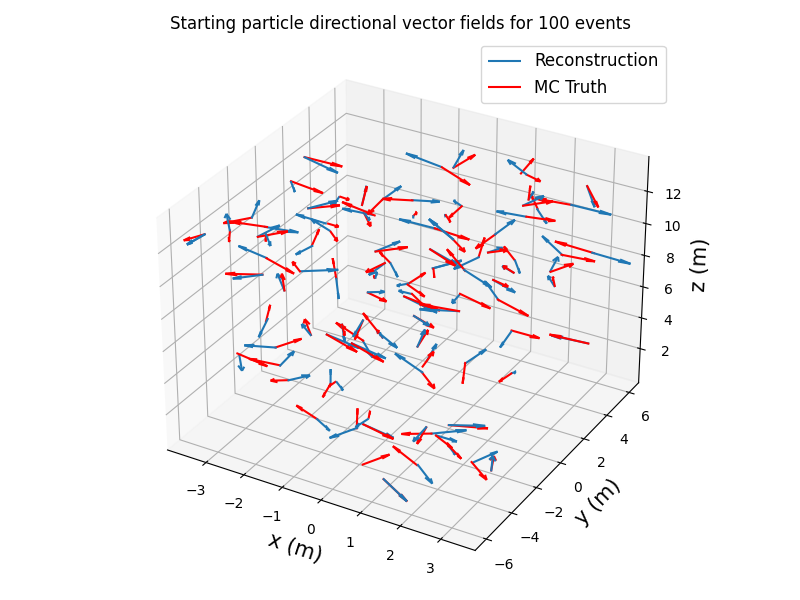

In [70]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.quiver(startpoints_reco[0][0]/100, startpoints_reco[0][1]/100, startpoints_reco[0][2]/100, directions_reco[0][0], directions_reco[0][1], directions_reco[0][2],label='Reconstruction')
ax.quiver(startpoints_truth[0][0]/100, startpoints_truth[0][1]/100, startpoints_truth[0][2]/100, directions_truth[0][0], directions_truth[0][1], directions_truth[0][2],color='r',label='MC Truth')
num = 100
for i in range(1,num):
    ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r')
ax.set_xlabel("x (m)", fontsize=15)
ax.set_ylabel("y (m)", fontsize=15)
ax.set_zlabel("z (m)", fontsize=15)
ax.set_title("Starting particle directional vector fields for " + str(num) + " events", fontsize=12)
ax.legend(fontsize=12)
plt.show()


In [71]:
direction_dot = []
for k in range(100):
    direction_dot.append(np.dot(directions_reco[k], directions_truth[k]))

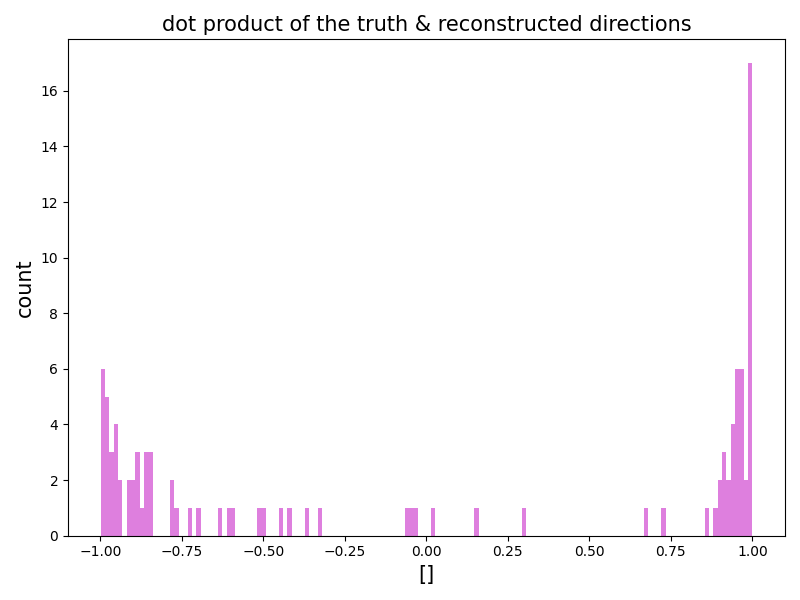

In [72]:
# Creating histogram
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(direction_dot, bins = 150,color='m',alpha=0.5)
ax.set_title("dot product of the truth & reconstructed directions",size=15)
ax.set_xlabel("[]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
plt.show()

In [79]:
index_of_0_99 = []
for k in range(100):
    if direction_dot[k] >= 0.99:
        index_of_0_99.append(k)


In [80]:
#reco_lists = [directions_reco, endpoints_reco, startpoints_reco, trklen_reco, trkphi_reco,
#              trkpidbestplane_reco, trktheta_reco, ntracks_reco]

In [81]:

for p in index_of_0_99:
    print(trklen_reco[p])

[6.75468]
[8.38073]
[9.1509]
[6.61309 1.4204 ]
[4.62356 1.93015]
[9.50354]
[4.70044]
[11.9007]
[9.98906]
[12.3638]
[9.35318]
[7.61506 1.73982]
[10.5256]


In [82]:
for p in index_of_0_99:
    print(trkphi_reco[p])

[-0.928229]
[0.428453]
[-0.529592]
[1.24554 1.33481]
[0.445639 0.726352]
[1.16648]
[-0.567896]
[-2.92053]
[0.149554]
[-1.75392]
[-1.73388]
[1.68145  0.563553]
[-1.38449]


In [87]:
for p in index_of_0_99:
    print(trkpidbestplane_reco[p])

[1.]
[0.]
[2.]
[1. 1.]
[1. 1.]
[2.]
[1.]
[2.]
[1.]
[2.]
[0.]
[0. 2.]
[1.]


In [90]:
test = []
for p in index_of_0_99:
    test.append(directions_reco[p])
    print(directions_reco[p])

[ 0.338577 -0.452315 -0.825092]
[ 0.609637  0.278452 -0.742164]
[ 0.480884 -0.281495  0.830368]
[0.129817 0.384951 0.913762]
[ 0.704207  0.336391 -0.625247]
[0.107341 0.250862 0.962053]
[ 0.759484 -0.484554 -0.43404 ]
[-0.160406  -0.0360492  0.986393 ]
[0.0335529  0.00505571 0.999424  ]
[-0.0722342 -0.39003    0.917965 ]
[-0.102397 -0.62229   0.77606 ]
[-0.0616314  0.554684   0.829776 ]
[ 0.104742 -0.555676  0.824775]


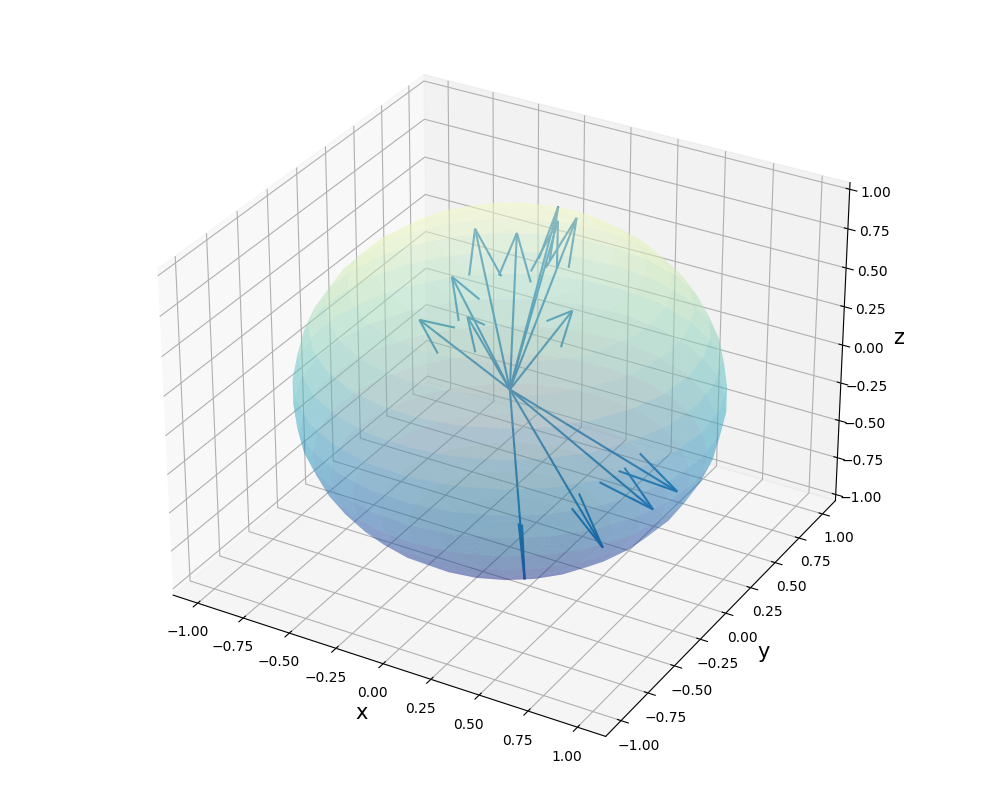

In [95]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 1
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r,alpha=0.3)
start = [0, 0, 0]
for i in range(len(test)):
    ax.quiver(start[0], start[1], start[2], test[i][0], test[i][1], test[i][2])
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15)
ax.set_zlabel("z", fontsize=15)
plt.show()

In [96]:
for p in index_of_0_99:
    print(energy_per_event[p])

[101.04]
[118.876]
[117.027]
[79.9649]
[50.0084]
[99.715]
[142.647]
[98.6537]
[121.085]
[97.3842]
[80.2024]
[139.912]
[104.278]


In [98]:
for p in index_of_0_99:
    print(hits_per_event[p])

[48.]
[54.]
[59.]
[53.]
[28.]
[58.]
[53.]
[69.]
[62.]
[64.]
[54.]
[59.]
[56.]
